# Task 1

**Description**: In this code, I generate 20 random values. I find peaks, valleys and calculate the depth of the deepest lake.

1. Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

2. Generating a list of 20 random values

In [3]:
random_values = np.random.randint(1,100,20)
print('List of 20 random values:', random_values)

List of 20 random values: [88 40  2 99 45 47 98  2 69 58 29 26 79 76 40 23 82 66 69  7]


3. Visualization of the list on the graph

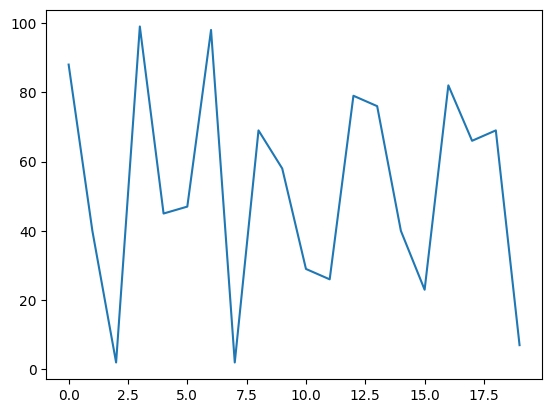

In [4]:
plt.plot(random_values)
plt.show()

4. Finding peaks in the list

In [5]:
peaks, _ = find_peaks(random_values)

# Check the leftmost value
if random_values[0] > random_values[1]:
    peaks = np.insert(peaks, 0, 0)
    
# Check the rightmost value
if random_values[-1] > random_values[-2]:
    peaks = np.append(peaks, len(random_values) - 1)

print('Peaks values:', random_values[peaks])

Peaks values: [88 99 98 69 79 82 69]


5. Calculating the depth of the deepest lake

In [6]:
max_depth = 0
deepest_lake = None

# Check all pairs of peaks
for i in range(len(peaks)):
    for j in range(i + 1, len(peaks)):
        start = peaks[i]
        end = peaks[j]
        
        # Check if there is any value between the peaks that is higher
        if np.any(random_values[start + 1:end] > min(random_values[start], random_values[end])):
            continue
                        
        # Minimum between peaks
        valley = np.min(random_values[start + 1:end])
        
        # Depth of the lake
        depth = min(random_values[start], random_values[end]) - valley
        
        # Check if this is the greatest depth
        if depth > max_depth:
            max_depth = depth
            deepest_lake = (start, end, valley, depth)

start, end, valley, depth = deepest_lake
print(
    f"---Deepest lake---\n"
    f"Peaks: {random_values[start]}, {random_values[end]}\n"
    f"Valley: {valley}\n"
    f"Depth: {depth}"
)

---Deepest lake---
Peaks: 88, 99
Valley: 2
Depth: 86


6. Visualization of the deepest lake on the graph

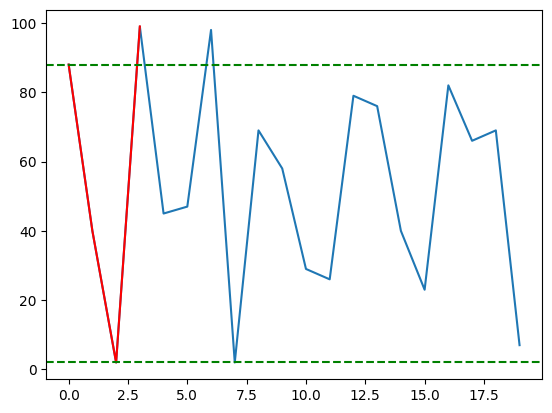

In [7]:
plt.plot(random_values)

# Highlight the section between the start and end peaks in red
plt.plot(range(start, end+1), random_values[start:end+1], color='r')

# Draw a horizontal green dashed line at the 'valley'
plt.axhline(y=valley, color='g', linestyle='--')

# Draw a horizontal green dashed line at the minimum value between the peaks
plt.axhline(y=min(random_values[start], random_values[end]), color='g', linestyle='--')

plt.show()

# Task 2

**Description**: Task about sum and product

There are two whole numbers:
1 < a,b <100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers. 
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog:

    Prod: I don't know the numbers;
    Sum: I know it;
    Prod: Then I know the numbers;
    Sum: Then I know the numbers too.

1. If Prod said "I don't know the numbers", I understand that these numbers cannot be a unique pair, since Prod would know these numbers.

2. If Sum said "I know it", I understand that these numbers are the only pair that fits both Sum and Prod.

3. Generate all possible pairs of numbers (a, b)

In [8]:
all_pairs = [(a, b) for a in range(2, 100) for b in range(a, 100)]

print(all_pairs[0:20])

[(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21)]


4. Create a list of products

In [19]:
product_dict = {}

for a, b in all_pairs:
    product = a * b
    if product in product_dict:
        product_dict[product].append((a, b)) # If the product is already in the dictionary, add the new pair
    else:
        product_dict[product] = [(a, b)] # If the product is not in the dictionary, create a new list with the current pair

for i, (product, pairs) in enumerate(product_dict.items()):
    if i >= 20:
        break
    print(product, pairs)

4 [(2, 2)]
6 [(2, 3)]
8 [(2, 4)]
10 [(2, 5)]
12 [(2, 6), (3, 4)]
14 [(2, 7)]
16 [(2, 8), (4, 4)]
18 [(2, 9), (3, 6)]
20 [(2, 10), (4, 5)]
22 [(2, 11)]
24 [(2, 12), (3, 8), (4, 6)]
26 [(2, 13)]
28 [(2, 14), (4, 7)]
30 [(2, 15), (3, 10), (5, 6)]
32 [(2, 16), (4, 8)]
34 [(2, 17)]
36 [(2, 18), (3, 12), (4, 9), (6, 6)]
38 [(2, 19)]
40 [(2, 20), (4, 10), (5, 8)]
42 [(2, 21), (3, 14), (6, 7)]


5. Leave only the values that have more than one pair

In [21]:
valid_products = {}

for product, pairs in product_dict.items():
    if len(pairs) > 1:
        valid_products[product] = pairs # Add the product to the dictionary along with its pairs

for i, (product, pairs) in enumerate(valid_products.items()):
    if i >= 20:
        break
    print(product, pairs)

12 [(2, 6), (3, 4)]
16 [(2, 8), (4, 4)]
18 [(2, 9), (3, 6)]
20 [(2, 10), (4, 5)]
24 [(2, 12), (3, 8), (4, 6)]
28 [(2, 14), (4, 7)]
30 [(2, 15), (3, 10), (5, 6)]
32 [(2, 16), (4, 8)]
36 [(2, 18), (3, 12), (4, 9), (6, 6)]
40 [(2, 20), (4, 10), (5, 8)]
42 [(2, 21), (3, 14), (6, 7)]
44 [(2, 22), (4, 11)]
48 [(2, 24), (3, 16), (4, 12), (6, 8)]
50 [(2, 25), (5, 10)]
52 [(2, 26), (4, 13)]
54 [(2, 27), (3, 18), (6, 9)]
56 [(2, 28), (4, 14), (7, 8)]
60 [(2, 30), (3, 20), (4, 15), (5, 12), (6, 10)]
64 [(2, 32), (4, 16), (8, 8)]
66 [(2, 33), (3, 22), (6, 11)]


6. Create a list of sums with numbers products

In [22]:
sum_dict = {}

for a, b in all_pairs:
    if a * b in valid_products: # Check that the product has more than one pair
        sum = a + b
        if sum in sum_dict:
            sum_dict[sum].append((a, b))
        else:
            sum_dict[sum] = [(a, b)]
            
for i, (sum_value, pairs) in enumerate(sum_dict.items()):
    if i >= 20:
        break
    print(sum_value, pairs)

8 [(2, 6), (4, 4)]
10 [(2, 8), (4, 6)]
11 [(2, 9), (3, 8), (4, 7), (5, 6)]
12 [(2, 10), (4, 8), (6, 6)]
14 [(2, 12), (4, 10), (5, 9), (6, 8)]
16 [(2, 14), (4, 12), (6, 10), (7, 9), (8, 8)]
17 [(2, 15), (3, 14), (4, 13), (5, 12), (6, 11), (7, 10), (8, 9)]
18 [(2, 16), (3, 15), (4, 14), (6, 12), (8, 10), (9, 9)]
20 [(2, 18), (4, 16), (5, 15), (6, 14), (8, 12), (9, 11), (10, 10)]
22 [(2, 20), (4, 18), (6, 16), (7, 15), (8, 14), (9, 13), (10, 12)]
23 [(2, 21), (3, 20), (4, 19), (5, 18), (6, 17), (7, 16), (8, 15), (9, 14), (10, 13), (11, 12)]
24 [(2, 22), (3, 21), (4, 20), (6, 18), (8, 16), (9, 15), (10, 14), (12, 12)]
26 [(2, 24), (4, 22), (5, 21), (6, 20), (8, 18), (9, 17), (10, 16), (11, 15), (12, 14)]
27 [(2, 25), (3, 24), (4, 23), (5, 22), (6, 21), (7, 20), (8, 19), (9, 18), (10, 17), (11, 16), (12, 15), (13, 14)]
28 [(2, 26), (3, 25), (4, 24), (6, 22), (7, 21), (8, 20), (9, 19), (10, 18), (12, 16), (13, 15), (14, 14)]
29 [(2, 27), (3, 26), (4, 25), (5, 24), (6, 23), (7, 22), (8, 21), 

7. Leave only those values ​​that have only one pair. Because Prod said, "Then I know the numbers," and Sum said, "Then I know the numbers too." His pair must have only one common option for the sum and product

In [12]:
valid_sums = {}

for sum, pairs in sum_dict.items():
    if len(pairs) == 1:
        valid_sums[sum] = pairs

print(valid_sums)

{7: [(3, 4)], 165: [(69, 96)], 173: [(77, 96)], 176: [(78, 98)], 179: [(80, 99)], 168: [(84, 84)], 172: [(84, 88)], 175: [(84, 91)], 178: [(88, 90)]}


**Conclusion:** For Sum and Prod there should only be single-values answers

In [13]:
final_pairs = []

for s in valid_sums:
    pair = sum_dict[s][0]
    if pair[0] * pair[1] in valid_products:
        final_pairs.append(pair)

print(final_pairs)

[(3, 4), (69, 96), (77, 96), (78, 98), (80, 99), (84, 84), (84, 88), (84, 91), (88, 90)]
